# Sklearn

## sklearn.metrics

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация датасетов

In [3]:
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 7)

In [4]:
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 7)

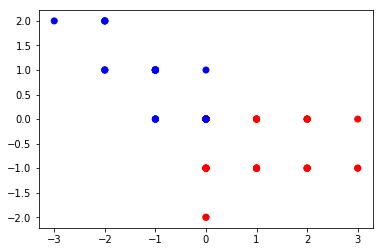

In [14]:
ab1 = map(lambda x: x[0], clf_data)
ab2 = map(lambda x: x[1], clf_data)
colors = ListedColormap(['red', 'blue'])
pylab.scatter(np.fromiter(ab1, dtype=np.int), np.fromiter(ab2, dtype=np.int), c = clf_target, cmap = colors)

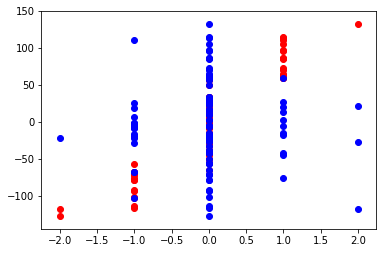

In [13]:
a = map(lambda x:x[1], reg_data)
b = map(lambda x:x[0], reg_data)
pylab.scatter(np.fromiter(a, dtype=np.int), reg_target, color = 'r')
pylab.scatter(np.fromiter(b, dtype=np.int), reg_target, color = 'b')

In [12]:
np.array(map(lambda x:x[1], reg_data))

array(<map object at 0x1a263f65c0>, dtype=object)

In [16]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = train_test_split(clf_data, clf_target,
                                                                                     test_size = 0.3, random_state = 1)

In [17]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = train_test_split(reg_data, reg_target,
                                                                                     test_size = 0.3, random_state = 1)

### Метрики качества в задачах классификации

#### Обучение модели классификации

In [18]:
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1)

In [19]:
classifier.fit(clf_train_data, clf_train_labels)

/Users/cheryomukhin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=1, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
predictions = classifier.predict(clf_test_data)

In [21]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [22]:
print (clf_test_labels)

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [23]:
print (predictions)

[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [24]:
print (probability_predictions)

[[0.00000000e+00 1.00000000e+00]
 [9.99999993e-01 6.61556341e-09]
 [9.99988143e-01 1.18567026e-05]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 4.62314295e-15]
 [3.03803294e-09 9.99999997e-01]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 5.05766731e-13]
 [0.00000000e+00 1.00000000e+00]
 [9.99999999e-01 5.18878464e-10]
 [9.99999241e-01 7.58783839e-07]
 [2.70446065e-04 9.99729554e-01]
 [0.00000000e+00 1.00000000e+00]
 [4.89202012e-11 1.00000000e+00]
 [1.00000000e+00 8.62325525e-11]
 [9.97365075e-01 2.63492515e-03]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.30597714e-15]
 [1.00000000e+00 3.28425090e-15]
 [1.83630888e-13 1.00000000e+00]
 [9.99999999e-01 5.19307103e-10]
 [9.99999639e-01 3.60586359e-07]
 [8.85166610e-01 1.14833390e-01]
 [1.00000000e+00 7.21139609e-14]
 [9.99999415e-01 5.85346707e-07]
 [9.86697401e-01 1.33025990e-02]
 [4.76887024e-02 9.52311298e-01]
 [1.22124533e-14 1.00000000e+00]
 [1.29348512e-03 9.98706515e-01]
 [1.00000000e+00 1.37248174e-13]]


#### accuracy

In [25]:
sum([1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

0.9666666666666667

In [26]:
metrics.accuracy_score(clf_test_labels, predictions)

0.9666666666666667

#### confusion matrix

In [27]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print (matrix)

[[17  1]
 [ 0 12]]


In [28]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])

29

In [29]:
matrix.diagonal().sum()

29

#### precision 

In [30]:
metrics.precision_score(clf_test_labels, predictions, pos_label = 0)

1.0

In [31]:
metrics.precision_score(clf_test_labels, predictions)

0.9230769230769231

#### recall

In [32]:
metrics.recall_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

In [33]:
metrics.recall_score(clf_test_labels, predictions)

1.0

#### f1

In [34]:
metrics.f1_score(clf_test_labels, predictions, pos_label = 0)

0.9714285714285714

In [35]:
metrics.f1_score(clf_test_labels, predictions)

0.9600000000000001

#### classification report

In [37]:
print (metrics.classification_report(clf_test_labels, predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.92      1.00      0.96        12

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### ROC curve

In [38]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

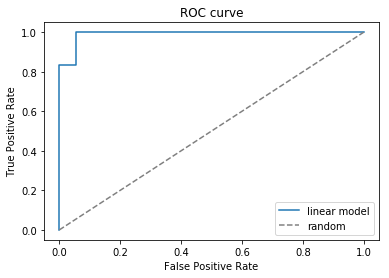

In [39]:
pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

#### ROC AUC

In [40]:
metrics.roc_auc_score(clf_test_labels, predictions)

0.9722222222222222

In [41]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

0.9907407407407407

#### PR AUC

In [42]:
metrics.average_precision_score(clf_test_labels, predictions)

0.9230769230769231

#### log_loss

In [43]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

0.2801206244766808

### Метрики качества в задачах регрессии

#### Обучение регрессионной модели 

In [44]:
regressor = linear_model.SGDRegressor(random_state = 1, n_iter = 20)

In [45]:
regressor.fit(reg_train_data, reg_train_labels)

/Users/cheryomukhin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=20, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=1, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [46]:
reg_predictions = regressor.predict(reg_test_data)

In [47]:
print (reg_test_labels)

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


In [48]:
print (reg_predictions)

[ -1.46503565   5.75776789 -50.13234306   5.05646094 -24.09370893
  -8.34831546  61.77254998 -21.98350565  30.65112022 -39.25972497
 -17.19337022  30.94178225  26.98820076  -6.08321732  -3.46551
 -78.9843398   84.80190097  14.80638314  22.91302375 -89.63572717
  14.5954632   31.64431951  95.81031534  21.5037679  -43.1101736
 -95.06972123  86.70086546   0.47837761 -16.44594704 -22.72581879]


#### mean absolute error

In [49]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

3.748761311885298

#### mean squared error

In [50]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

24.114925597460914

#### root mean squared error

In [51]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

4.91069502183356

#### r2 score

In [52]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.989317615054695